In [26]:
import pandas as pd

In [27]:
data= pd.read_csv('household_power_consumption.txt', delimiter=';')

C:\Users\mrugank7\AppData\Local\Temp\ipykernel_1113680\1869461197.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv('household_power_consumption.txt', delimiter=';')


In [28]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [29]:
data.dropna(inplace=True)

In [30]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Preprocessing

In [31]:
data['date_time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

C:\Users\mrugank7\AppData\Local\Temp\ipykernel_1113680\1181409081.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date_time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])


In [32]:
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data = data.dropna(subset=['Global_active_power'])

In [33]:
data['date_time'] = pd.to_datetime(data['date_time']) 

In [34]:
data['year'] = data['date_time'].apply(lambda x: x.year)
data['quarter'] = data['date_time'].apply(lambda x: x.quarter)
data['month'] = data['date_time'].apply(lambda x: x.month)
data['day'] = data['date_time'].apply(lambda x: x.day)

In [35]:
data = data.loc[:,['date_time','Global_active_power', 'year','quarter','month','day']]

In [36]:
data.sort_values('date_time', inplace=True, ascending=True)

In [37]:
data = data.reset_index(drop=True)

In [38]:
data['weekday'] = data['date_time'].apply(lambda x: x.weekday() < 5).astype(int)

In [39]:
print('Number of rows and columns:', data.shape)
print('Minimum date_time:', data.date_time.min())
print('Maximum date_time:', data.date_time.max())


Number of rows and columns: (2049280, 7)
Minimum date_time: 2006-12-16 17:24:00
Maximum date_time: 2010-11-26 21:02:00


In [61]:
data.head()

,date_time,Global_active_power,year,quarter,month,day,weekday
0,2006-12-16 17:24:00,4.216,2006,4,12,16,0
1,2006-12-16 17:25:00,5.360,2006,4,12,16,0
2,2006-12-16 17:26:00,5.374,2006,4,12,16,0
3,2006-12-16 17:27:00,5.388,2006,4,12,16,0
4,2006-12-16 17:28:00,3.666,2006,4,12,16,0


EDA

C:\Users\mrugank7\AppData\Local\Temp\ipykernel_1113680\148987911.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Global_active_power,color='blue')


Kurtosis of normal distribution: 4.218671866132123
Skewness of normal distribution: 1.7862320846320818


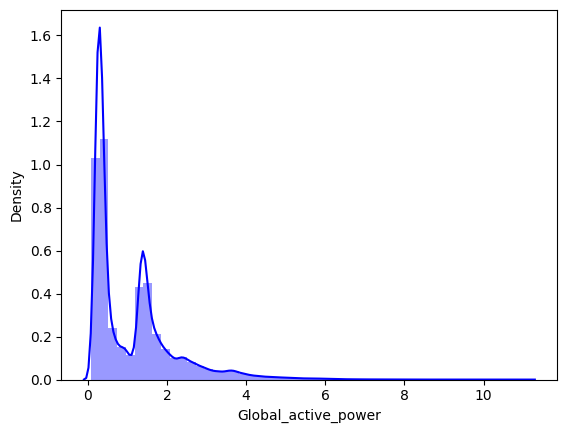

In [40]:
import scipy.stats as stats
import seaborn as sns
sns.distplot(data.Global_active_power,color='blue')
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data.Global_active_power)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data.Global_active_power)))

In [41]:
import matplotlib.pyplot as plt

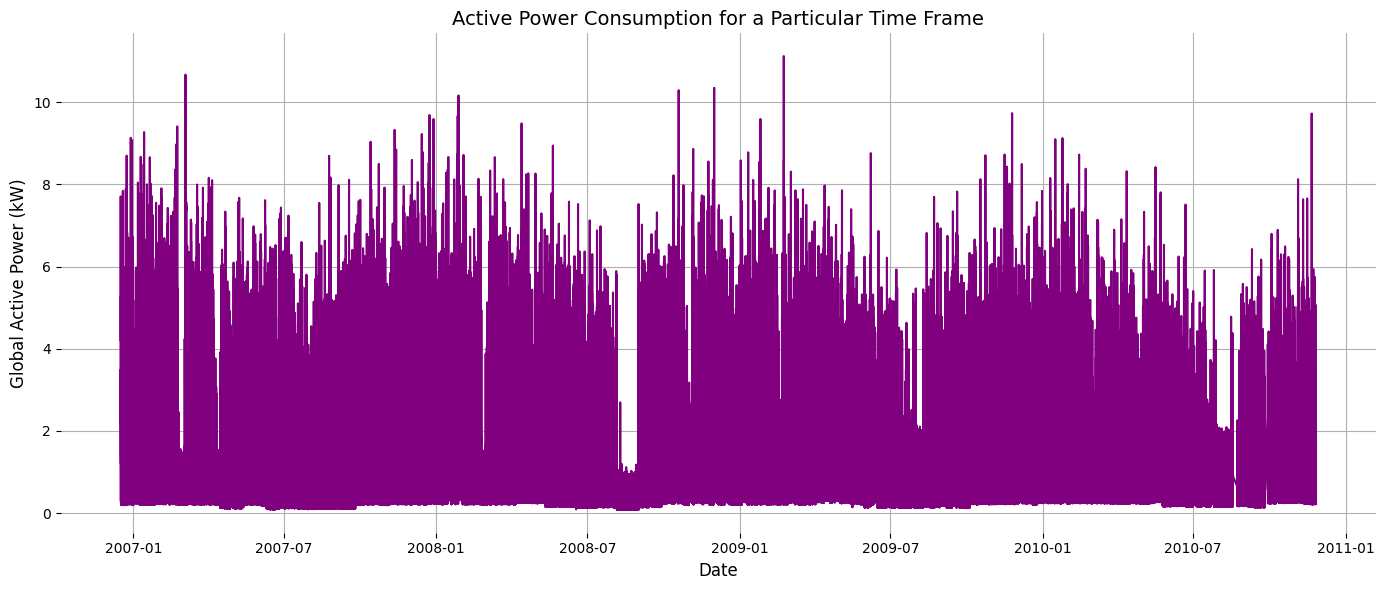

In [42]:
data1 = data[(data.date_time >= '2006-12-16') & (data.date_time < '2010-11-26')]

plt.figure(figsize=(14,6))
plt.plot(data1.date_time, data1.Global_active_power, color='purple')
plt.ylabel('Global Active Power (kW)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Active Power Consumption for a Particular Time Frame', fontsize=14)
plt.tight_layout()
plt.grid(True)
sns.despine(bottom=True, left=True)
plt.show()

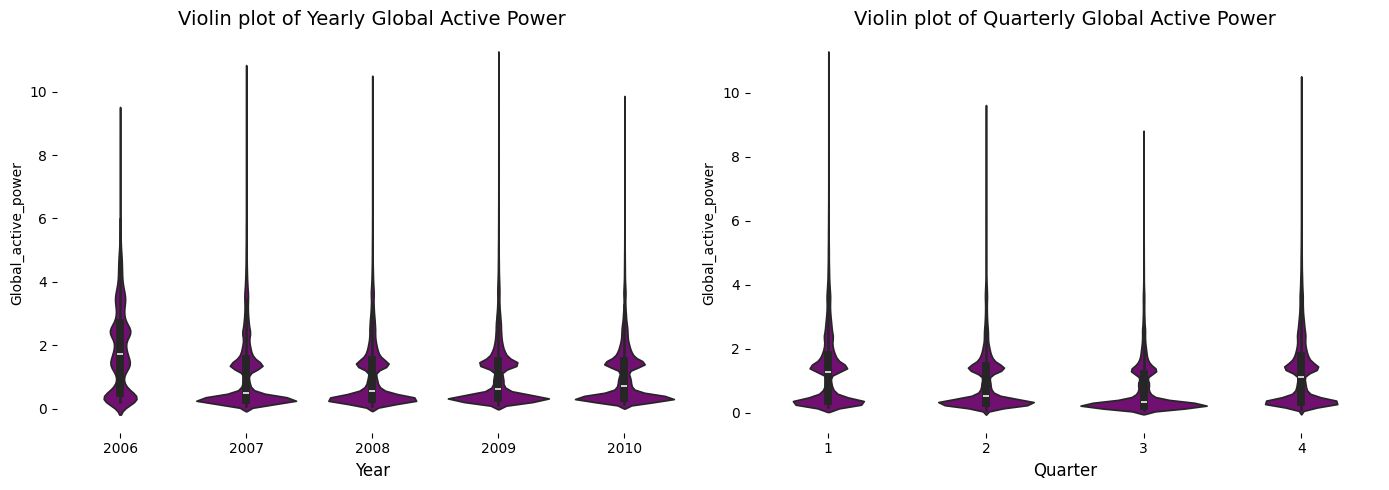

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.violinplot(x="year", y="Global_active_power", data=data, color='purple')
plt.xlabel('Year', fontsize=12)
plt.title('Violin plot of Yearly Global Active Power', fontsize=14)
sns.despine(left=True, bottom=True)
plt.tight_layout() 


plt.subplot(1,2,2)
sns.violinplot(x="quarter", y="Global_active_power", data=data, color='purple')
plt.xlabel('Quarter', fontsize=12)
plt.title('Violin plot of Quarterly Global Active Power', fontsize=14)
sns.despine(left=True, bottom=True)
plt.tight_layout()

Text(0.5, 1.0, 'Global Active Power Distribution')

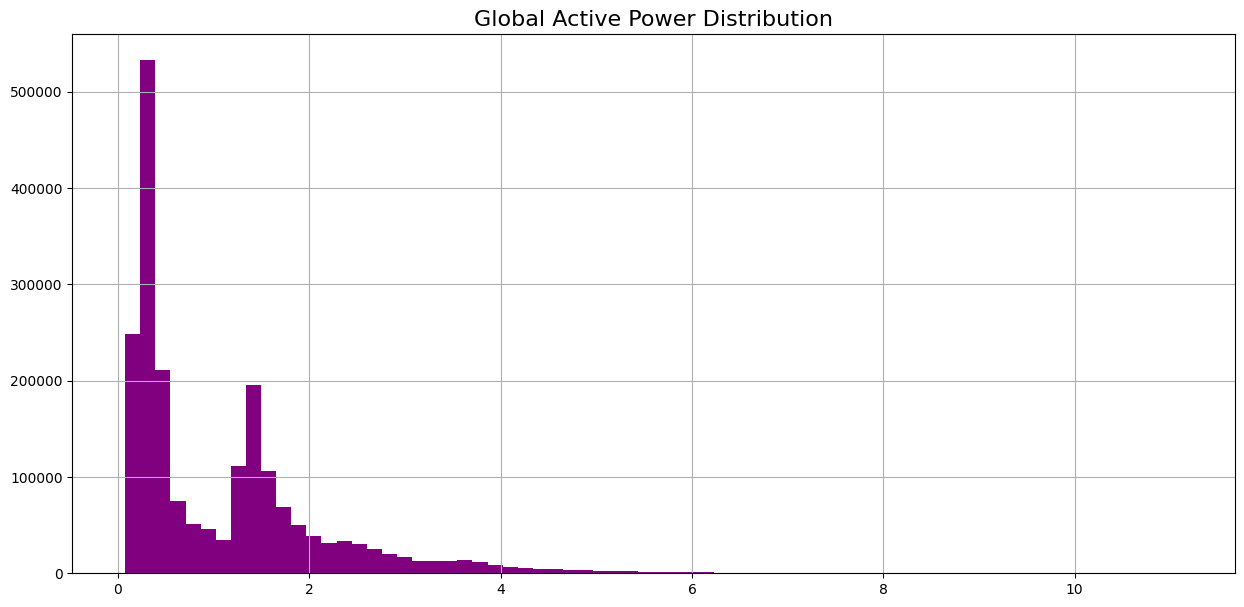

In [44]:
plt.figure(figsize=(15,7))
data1['Global_active_power'].hist(bins=70, color='purple')
plt.title('Global Active Power Distribution', fontsize=16)


Text(0.5, 1.0, 'Normal Probability Plot of Global Active Power')

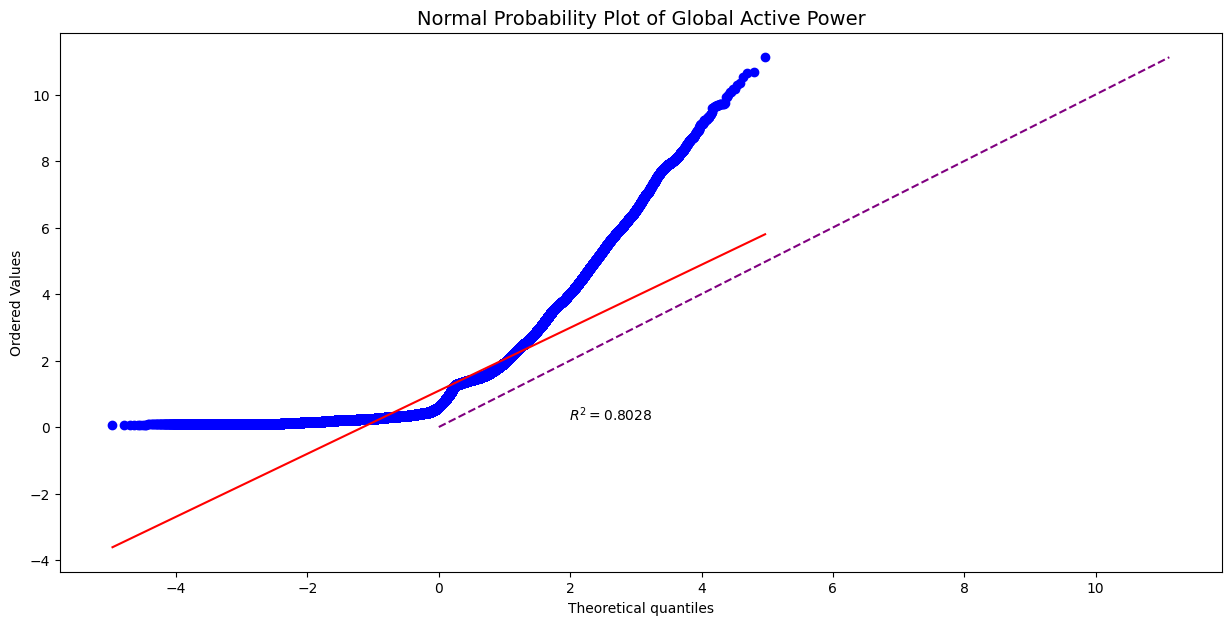

In [62]:
plt.figure(figsize=(15,7))
stats.probplot(data1['Global_active_power'], plot=plt, fit=True, rvalue=True)
plt.plot([0, max(data1['Global_active_power'])], [0, max(data1['Global_active_power'])], color='purple', linestyle='--')
plt.title('Normal Probability Plot of Global Active Power', fontsize=14)

In [45]:
data1=data.loc[:,['date_time','Global_active_power']]
data1.set_index('date_time',inplace=True)

C:\Users\mrugank7\AppData\Local\Temp\ipykernel_1113680\724539233.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax3.plot(data1['Global_active_power'].resample('M').mean(), linewidth=1, color='purple')
C:\Users\mrugank7\AppData\Local\Temp\ipykernel_1113680\724539233.py:35: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  ax4.plot(data1['Global_active_power'].resample('Q').mean(),linewidth=1, color='purple')
C:\Users\mrugank7\AppData\Local\Temp\ipykernel_1113680\724539233.py:45: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  ax5.plot(data1['Global_active_power'].resample('A').mean(),linewidth=1, color='purple')


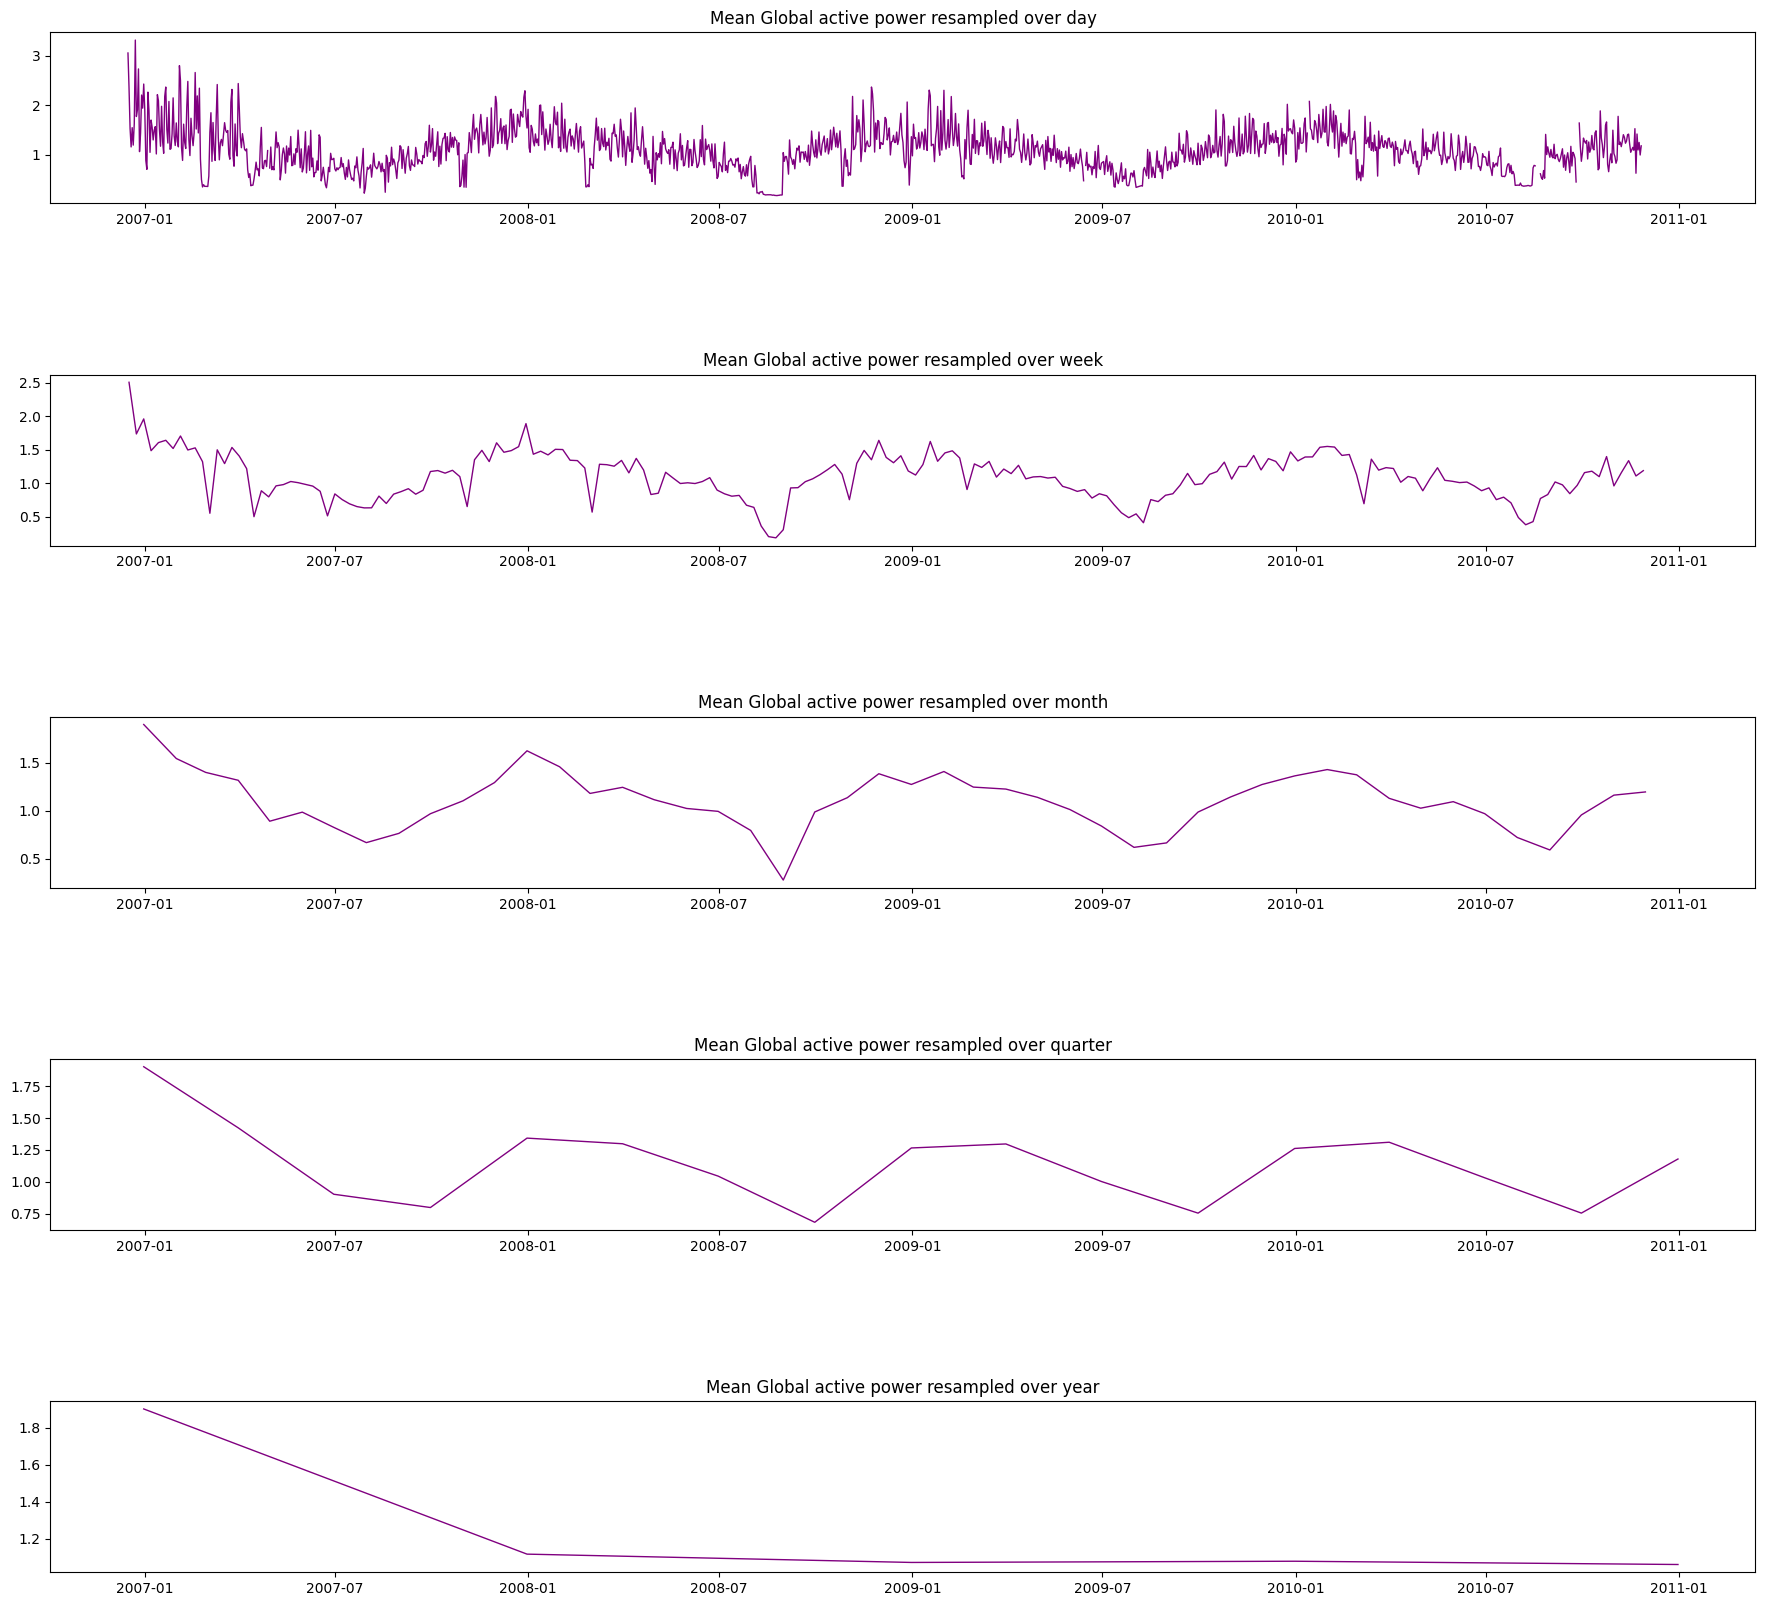

In [46]:
fig = plt.figure(figsize=(22,20))

fig.subplots_adjust(hspace=1)


ax1 = fig.add_subplot(5,1,1)
ax1.plot(data1['Global_active_power'].resample('D').mean(), linewidth=1, color='purple')
ax1.set_title('Mean Global active power resampled over day')
ax1.tick_params(axis='both', which='major')


ax2 = fig.add_subplot(5,1,2, sharex=ax1)
ax2.plot(data1['Global_active_power'].resample('W').mean(), linewidth=1, color='purple')
ax2.set_title('Mean Global active power resampled over week')
ax2.tick_params(axis='both', which='major')

ax3 = fig.add_subplot(5,1,3, sharex=ax1)
ax3.plot(data1['Global_active_power'].resample('M').mean(), linewidth=1, color='purple')
ax3.set_title('Mean Global active power resampled over month')
ax3.tick_params(axis='both', which='major')


ax4  = fig.add_subplot(5,1,4, sharex=ax1)
ax4.plot(data1['Global_active_power'].resample('Q').mean(),linewidth=1, color='purple')
ax4.set_title('Mean Global active power resampled over quarter')
ax4.tick_params(axis='both', which='major')


ax5  = fig.add_subplot(5,1,5, sharex=ax1)
ax5.plot(data1['Global_active_power'].resample('A').mean(),linewidth=1, color='purple')
ax5.set_title('Mean Global active power resampled over year')
ax5.tick_params(axis='both', which='major')

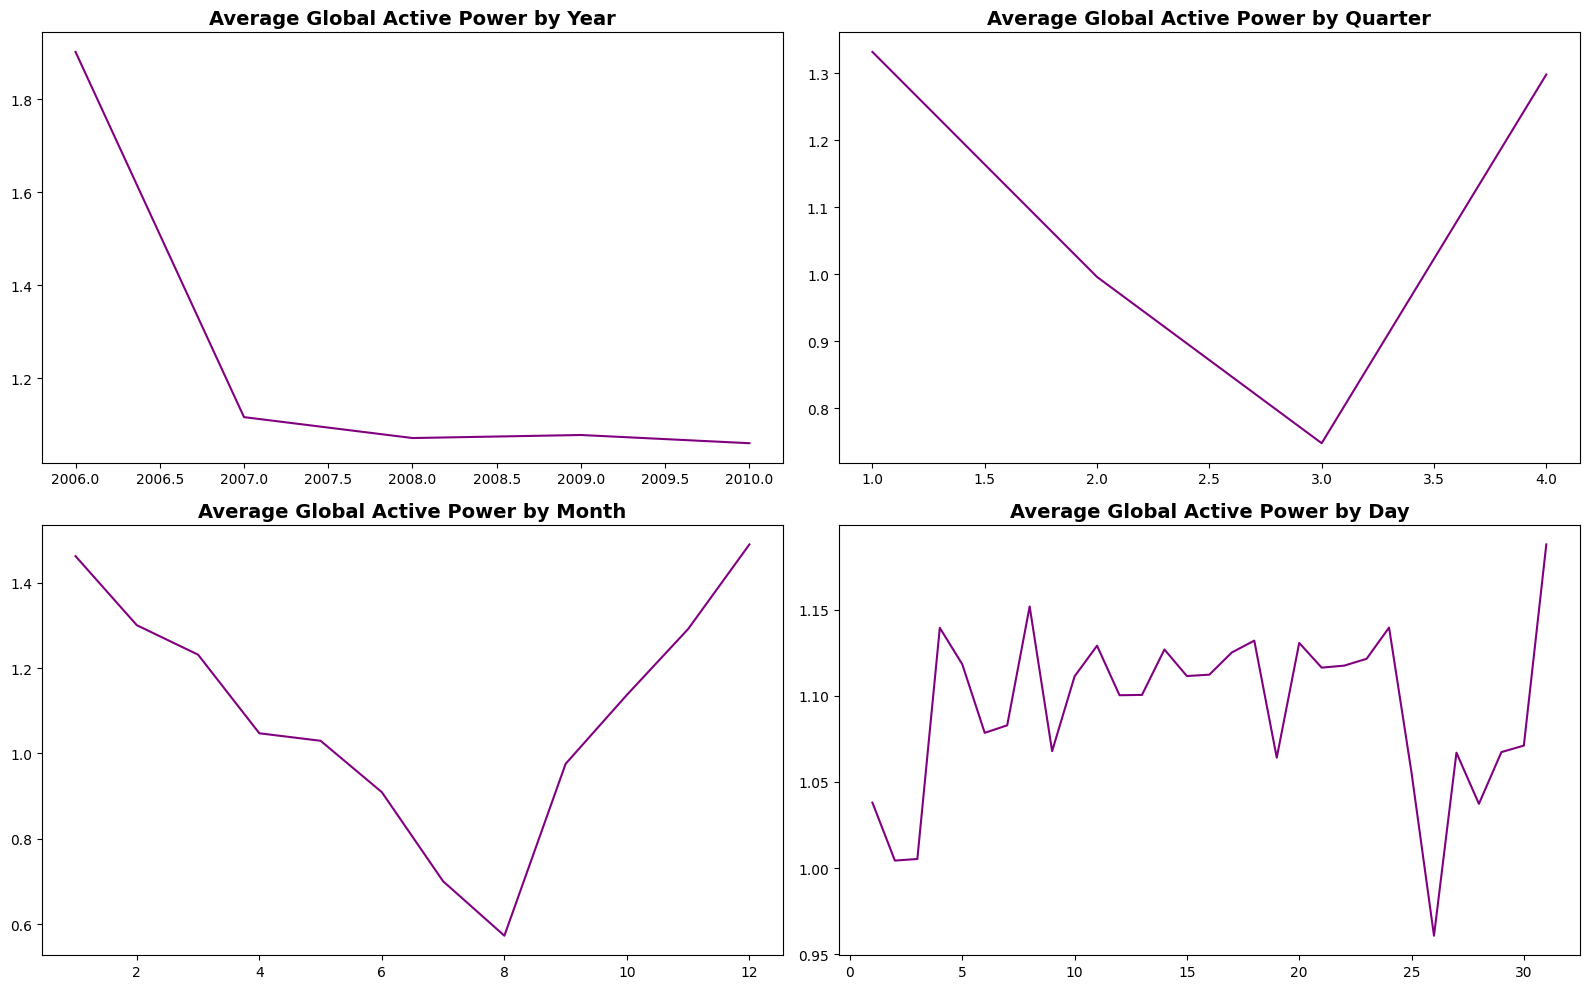

In [47]:
plt.figure(figsize=(16,10))


plt.subplot(2,2,1)
grouped_by_year = data.groupby('year').Global_active_power.agg('mean')
grouped_by_year.plot(color='purple')
plt.xlabel('')
plt.title('Average Global Active Power by Year', fontsize=14, fontweight='bold')


plt.subplot(2,2,2)
grouped_by_quarter = data.groupby('quarter').Global_active_power.agg('mean')
grouped_by_quarter.plot(color='purple')
plt.xlabel('')
plt.title('Average Global Active Power by Quarter', fontsize=14, fontweight='bold')


plt.subplot(2,2,3)
grouped_by_month = data.groupby('month').Global_active_power.agg('mean')
grouped_by_month.plot(color='purple')
plt.xlabel('')
plt.title('Average Global Active Power by Month', fontsize=14, fontweight='bold')


plt.subplot(2,2,4)
grouped_by_day = data.groupby('day').Global_active_power.agg('mean')
grouped_by_day.plot(color='purple')
plt.xlabel('')
plt.title('Average Global Active Power by Day', fontsize=14, fontweight='bold')


plt.tight_layout()
plt.show()

In [48]:
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(window=30).mean()
    rolstd = timeseries.rolling(window=30).std()
    
    
    plt.figure(figsize=(20,5))
    sns.despine(left=True)
    orig = plt.plot(timeseries, color='purple',label='Original')
    mean = plt.plot(rolmean, color='yellow', label='Rolling Mean')
    std = plt.plot(rolstd, color='cyan', label = 'Rolling Std')

    
    plt.legend(loc='best')    
    plt.title('Rolling Mean & Standard Deviation of Global Active Power')
    plt.show()

   

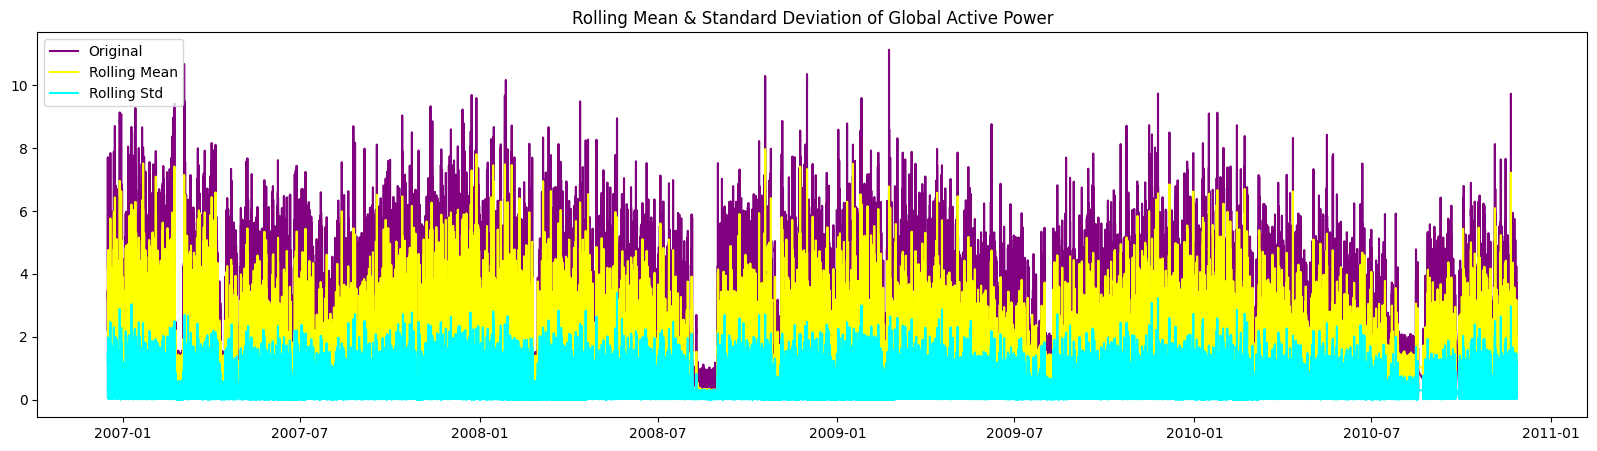

In [49]:
test_stationarity(data1.Global_active_power.dropna())

Model Development

In [50]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [52]:
import numpy as np

In [53]:


dataset = data.Global_active_power.values.astype('float32')

dataset = np.reshape(dataset, (-1, 1))

scaler = MinMaxScaler(feature_range=(0, 1))

dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [54]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [55]:
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

In [56]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [57]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=1240, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=4)], verbose=1, shuffle=False)

model.summary()



Epoch 1/20

1323/1323 [==============================] - 29s 17ms/step - loss: 0.0011 - val_loss: 4.5383e-04
Epoch 2/20
1323/1323 [==============================] - 21s 16ms/step - loss: 6.6463e-04 - val_loss: 3.9627e-04
Epoch 3/20
1323/1323 [==============================] - 20s 15ms/step - loss: 6.4343e-04 - val_loss: 3.9169e-04
Epoch 4/20
1323/1323 [==============================] - 28s 21ms/step - loss: 6.3596e-04 - val_loss: 3.9348e-04
Epoch 5/20
1323/1323 [==============================] - 44s 34ms/step - loss: 6.2975e-04 - val_loss: 3.9319e-04
Epoch 6/20
1323/1323 [==============================] - 36s 27ms/step - loss: 6.2823e-04 - val_loss: 3.8898e-04
Epoch 7/20
1323/1323 [==============================] - 41s 31ms/step - loss: 6.2560e-04 - val_loss: 3.8807e-04
Epoch 8/20
1323/1323 [==============================] - 38s 29ms/step - loss: 6.2540e-04 - val_loss: 3.9195e-04
Epoch 9/20
1323/1323 [==============================] - 36s 27ms/step - loss: 6.2270e-04 - val_loss: 3.88

Model Evaluation

In [58]:

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

12808/12808 [==============================] - 45s 3ms/step
Train Mean Absolute Error: 0.0928002115013585
Train Root Mean Squared Error: 0.26858729107149554
Test Mean Absolute Error: 0.07654364626555614
Test Root Mean Squared Error: 0.21788069649907046


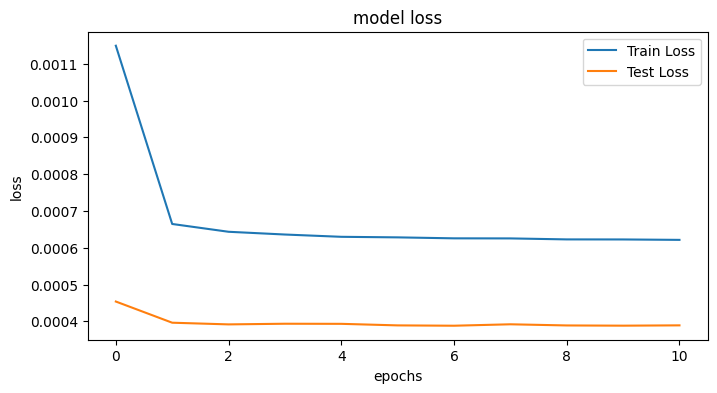

In [59]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

Future comsumption prediction

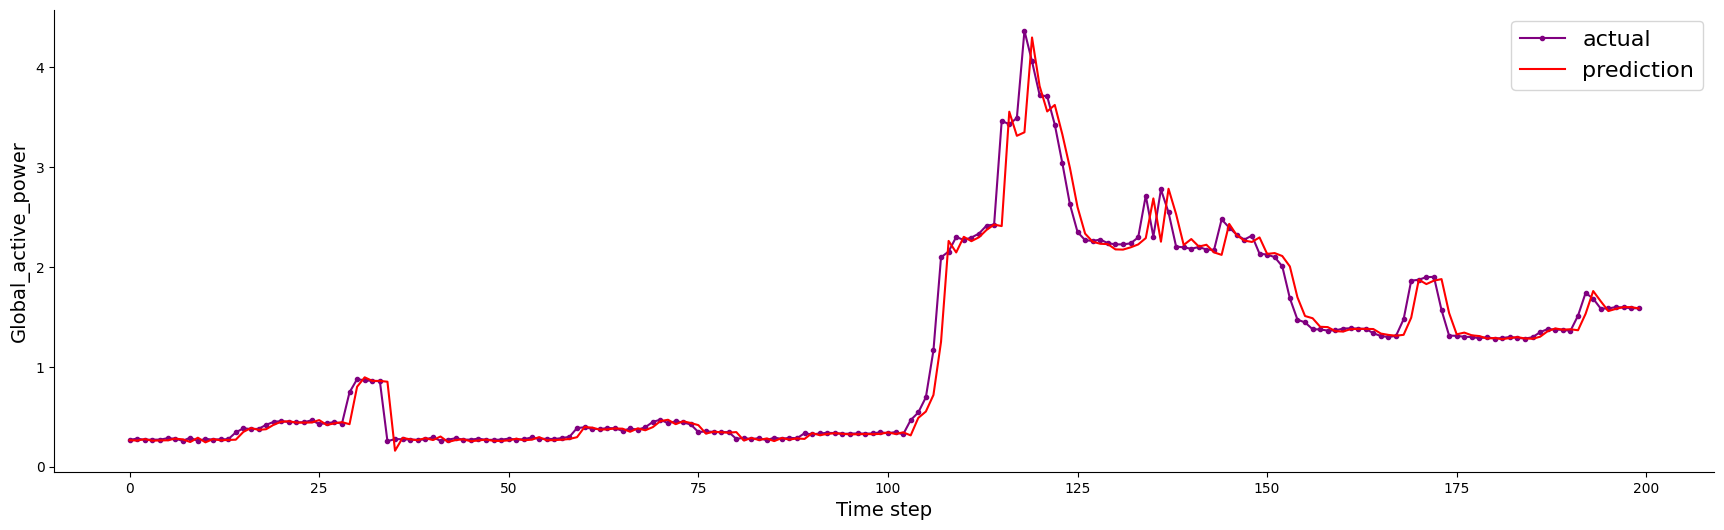

In [60]:
aa=[x for x in range(200)]

plt.figure(figsize=(20,6))


plt.plot(aa, Y_test[0][:200], marker='.', label="actual", color='purple')
plt.plot(aa, test_predict[:,0][:200], '-', label="prediction", color='red')

sns.despine(top=True)

plt.subplots_adjust(left=0.07)


plt.ylabel('Global_active_power', size=14)
plt.xlabel('Time step', size=14)


plt.legend(fontsize=16)
plt.show()